<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/portfolio/momentum_investing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [71]:
nifty50_url = "https://raw.githubusercontent.com/anirbanghoshsbi/data/main/ind_nifty50list.csv"
nifty50 = pd.read_csv(nifty50_url)
tickers = nifty50['Symbol'].apply(lambda x: x + ".NS").tolist()
# Bank Nifty Stocks
nifty_stocks = tickers
start_date='2015-01-01'
end_date='2019-12-26'

In [72]:
dataset = yf.download(nifty_stocks, start=start_date,end=end_date)['Adj Close']


[*********************100%%**********************]  50 of 50 completed


In [73]:
'''
# Define the list of Nifty 50 constituents
nifty_50_constituents = ['RELIANCE.NS', 'SBIN.NS', 'TCS.NS']  # Add more constituents as needed

# Download historical data for each constituent
data = {}
for ticker in nifty_50_constituents:
    data[ticker] = yf.download(ticker, start='1927-01-01', end='2014-12-31')
'''
# Combine the adjusted close prices into a single DataFrame

adj_close_data = {}
for ticker, df in dataset.items():
    if isinstance(df, pd.DataFrame) and 'Adj Close' in df.columns:
        adj_close_data[ticker] = df['Adj Close']
    elif isinstance(df, pd.Series):
        adj_close_data[ticker] = df  # Assuming the Series itself represents the 'Adj Close' prices

adj_close = pd.DataFrame(adj_close_data)


# Calculate monthly returns
returns = adj_close.pct_change(252)

# Step 2: Calculate the monthly momentum variable
momentum_variable = returns.rolling(window=252).sum()

# Step 3: Select the top 25 stocks based on momentum variable
top_50_stocks = momentum_variable.sum().nlargest(25).index
top_50_stocks_data = returns[top_50_stocks]

#
# Step 4: Implement PCA on the selected stocks after handling missing values
cleaned_data = top_50_stocks_data.dropna()  # Drop rows with missing values


In [74]:
cleaned_data

,BAJFINANCE.NS,BAJAJFINSV.NS,ADANIENT.NS,TITAN.NS,JSWSTEEL.NS,HINDALCO.NS,RELIANCE.NS,LTIM.NS,TATASTEEL.NS,TATACONSUM.NS,...,NESTLEIND.NS,INDUSINDBK.NS,TCS.NS,UPL.NS,GRASIM.NS,DIVISLAB.NS,TECHM.NS,ADANIPORTS.NS,ICICIBANK.NS,ASIANPAINT.NS
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-28,0.958854,0.889209,0.710234,0.309174,0.353579,0.622341,0.596984,0.104998,0.585402,0.324786,...,-0.002614,0.438044,0.013420,0.566046,0.419850,-0.432336,-0.218241,0.773073,0.253628,0.110701
2017-07-31,0.932037,0.920864,0.698943,0.334800,0.387118,0.625410,0.604217,0.104244,0.615025,0.330948,...,-0.034229,0.450603,0.012822,0.513948,0.421284,-0.441414,-0.208286,0.762613,0.273395,0.114191
2017-08-01,0.915345,0.949802,0.743302,0.313008,0.385757,0.680435,0.580394,0.130859,0.638187,0.295643,...,-0.049847,0.445968,-0.003181,0.555721,0.469006,-0.445459,-0.179909,0.792313,0.248748,0.076969
2017-08-02,0.737962,0.843230,0.721415,0.341688,0.339231,0.744477,0.603585,0.128238,0.610789,0.299475,...,-0.051506,0.439811,-0.011826,0.550325,0.478072,-0.436091,-0.171105,0.838705,0.278978,0.083518
2017-08-03,0.742125,0.957503,0.671490,0.361996,0.298602,0.661914,0.641711,0.141153,0.603341,0.251554,...,-0.036918,0.401567,-0.015201,0.458486,0.502004,-0.436838,-0.163504,0.787025,0.211480,0.083959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-18,0.654533,0.586727,0.326451,0.265267,-0.103684,-0.028170,0.372384,0.085429,-0.118454,0.491629,...,0.424631,-0.059159,0.115661,0.142327,-0.078181,0.254666,0.105711,-0.000141,0.544459,0.347389
2019-12-19,0.685176,0.636308,0.402795,0.285467,-0.105246,-0.000538,0.441386,0.127589,-0.101473,0.524840,...,0.459011,-0.045668,0.155299,0.139219,-0.056522,0.266548,0.148337,0.016196,0.557658,0.402349
2019-12-20,0.666237,0.586878,0.435355,0.317212,-0.096881,-0.008331,0.418856,0.165887,-0.071174,0.530289,...,0.503627,-0.045306,0.150668,0.153558,-0.061772,0.231589,0.152776,-0.002555,0.554328,0.374363


In [79]:
#cleaned_data = cleaned_data.clip(lower=cleaned_data.quantile(0.01), upper=cleaned_data.quantile(0.99), axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

pca = PCA(n_components=1)  # Considering only one component for simplicity
pca.fit(scaled_data)

# Step 5: Select the top 10 stocks based on PCA scores
pca_scores = pca.components_[0]
top_10_index = np.argsort(pca_scores)[-10:]
top_10_stocks = cleaned_data.iloc[:, top_10_index]

# Now, top_10_stocks contains the top 10 stocks for investment based on PCA scores
print(top_10_stocks)


            ADANIPORTS.NS  TITAN.NS  TATACONSUM.NS  RELIANCE.NS  HINDALCO.NS  \
Date                                                                           
2017-07-28       0.773073  0.309174       0.324786     0.596984     0.622341   
2017-07-31       0.762613  0.334800       0.330948     0.604217     0.625410   
2017-08-01       0.792313  0.313008       0.295643     0.580394     0.680435   
2017-08-02       0.838705  0.341688       0.299475     0.603585     0.744477   
2017-08-03       0.787025  0.361996       0.251554     0.641711     0.661914   
...                   ...       ...            ...          ...          ...   
2019-12-18      -0.000141  0.265267       0.491629     0.372384    -0.028170   
2019-12-19       0.016196  0.285467       0.524840     0.441386    -0.000538   
2019-12-20      -0.002555  0.317212       0.530289     0.418856    -0.008331   
2019-12-23       0.022116  0.338980       0.606236     0.449972    -0.005852   
2019-12-24       0.036666  0.296218     

In [76]:
pca_scores.shape

(25,)

[*********************100%%**********************]  10 of 10 completed


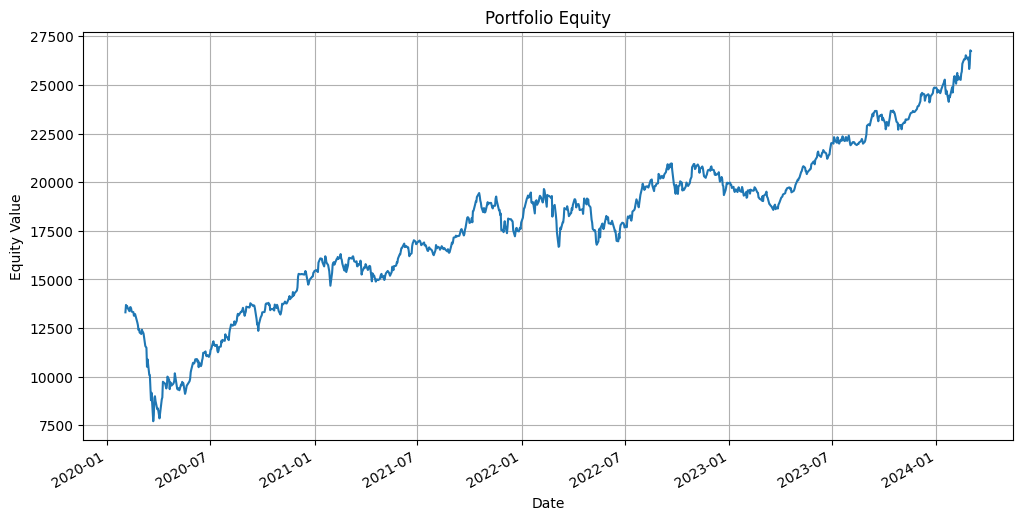

In [82]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Get today's date
today = pd.Timestamp.today().strftime('%Y-%m-%d')

# Define stock symbols and weights
symbols = ['HDFCBANK.NS','TATASTEEL.NS','GRASIM.NS','INDUSINDBK.NS','MARUTI.NS',
          'ADANIPORTS.NS', 'TITAN.NS', 'TATACONSUM.NS',  'RELIANCE.NS', 'HINDALCO.NS']
weights = [1,1,1,1,1,1,1,1,1,1]
# Download historical price data
data = yf.download(symbols, start="2020-02-01", end=today)["Adj Close"]

# Calculate portfolio return by multiplying weights with daily returns
portfolio_return = (data * weights).sum(axis=1)

# Plot the portfolio return
plt.figure(figsize=(12, 6))
portfolio_return.plot(title="Portfolio Equity")
plt.ylabel("Equity Value")
plt.xlabel("Date")
plt.grid(True)
plt.show()